# Spotify Project


## Introduction


The project applies PyTorch, a leading deep learning framework, to the task of predicting Spotify’s popularity score (0–100) for songs based on their audio features. Our goal is to collaboratively build a neural network capable of estimating a song’s popularity using attributes such as danceability, energy, valence, tempo, and more.

By shifting from traditional machine learning approaches to a neural network–based solution, we aim to gain practical experience with an industry-standard tool while addressing a real-world regression problem. The project will involve designing, training, and evaluating multiple network architectures, with a focus on improving performance through iterative experimentation.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preprocessing


In [2]:
# Load the dataset
data = pd.read_csv('dataset/SpotifyFeatures.csv')

In [3]:
# Display the first few rows of the dataset
data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [4]:
# Display the shape of 'data' DataFrame 
n_rows, n_cols = data.shape
print(f"The DataFrame has {n_rows} rows and {n_cols} columns") 

The DataFrame has 232725 rows and 18 columns


In [5]:
# Display informative summary of the 'data' DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [6]:
# Check for any duplicates in the dataframe
duplicates = data[data.duplicated()]
print(f"Number of duplicates: {duplicates.shape[0]}")

Number of duplicates: 0


In [7]:
# Check for missing values in 'data' DataFrame
display(data.isna().sum())

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [8]:
# Drop missing values
data = data.dropna()

# Check for missing values again
data.isna().sum()
df = data.copy()

In [9]:
# Creating feature names list
features = ['danceability', 'energy', 'acousticness', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

target = ['popularity']

In [10]:
df.isna().sum().sort_values(ascending=False)

# Drop non-numeric / ID-like columns
drop_cols = ['artist_name', 'track_name', 'track_id', 'key', 'mode', 'time_signature']
df_model = df.drop(columns=drop_cols)

df_model.head()

,genre,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,Movie,0,0.611,0.389,99373,0.910,0.000,0.3460,-1.828,0.0525,166.969,0.814
1,Movie,1,0.246,0.590,137373,0.737,0.000,0.1510,-5.559,0.0868,174.003,0.816
2,Movie,3,0.952,0.663,170267,0.131,0.000,0.1030,-13.879,0.0362,99.488,0.368
3,Movie,0,0.703,0.240,152427,0.326,0.000,0.0985,-12.178,0.0395,171.758,0.227
4,Movie,4,0.950,0.331,82625,0.225,0.123,0.2020,-21.150,0.0456,140.576,0.390


## Popularity by genre


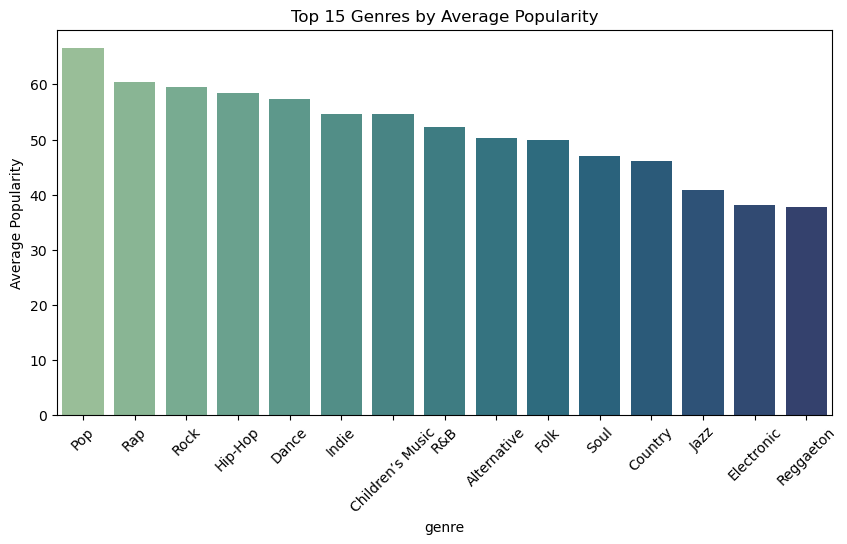

In [11]:
plt.figure(figsize=(10,5))
genre_pop = df.groupby('genre')['popularity'].mean().sort_values(ascending=False).head(15)
sns.barplot(x=genre_pop.index, y=genre_pop.values, palette='crest')
plt.xticks(rotation=45)
plt.ylabel('Average Popularity')
plt.title('Top 15 Genres by Average Popularity')
plt.show()

## Popularity vs Valence


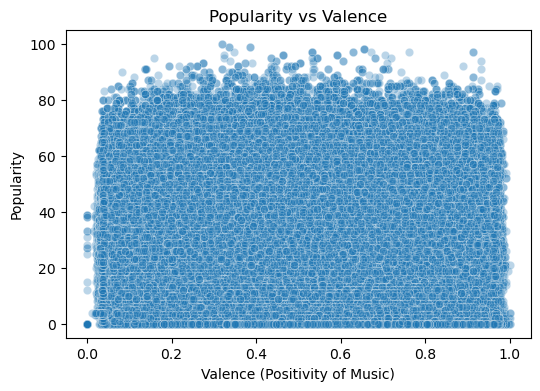

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='valence', y='popularity', alpha=0.3)
plt.title("Popularity vs Valence")
plt.xlabel("Valence (Positivity of Music)")
plt.ylabel("Popularity")
plt.show()

## Distribution of audio features


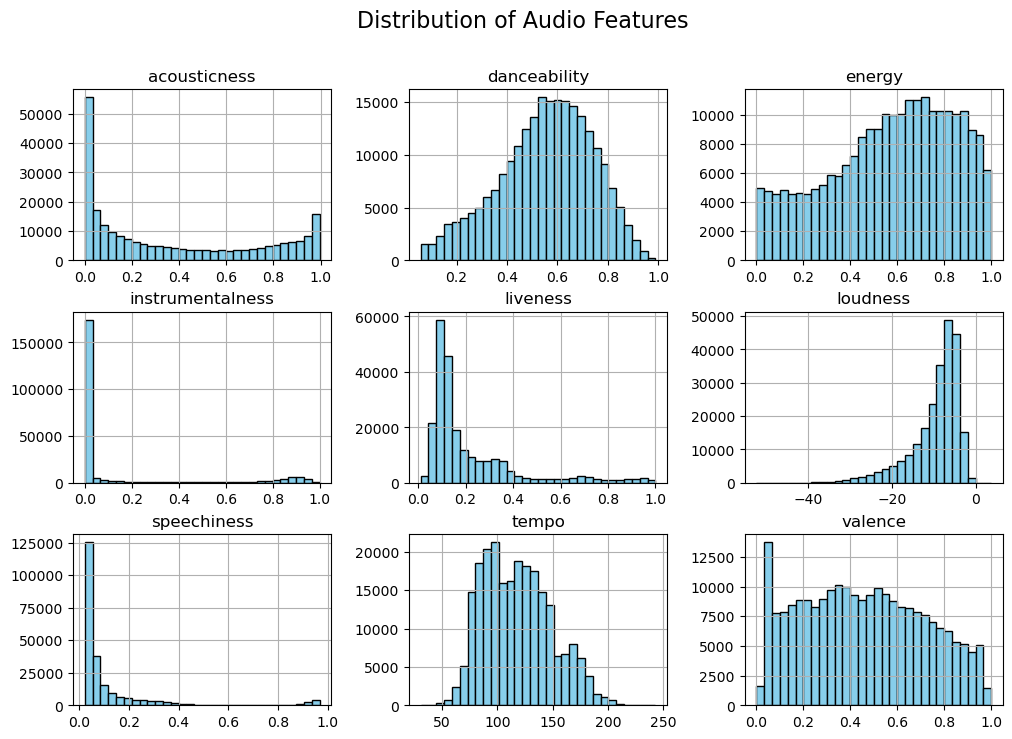

In [13]:
num_features = ['acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence']
df[num_features].hist(bins=30, figsize=(12,8), color='skyblue', edgecolor='black')
plt.suptitle("Distribution of Audio Features", fontsize=16)
plt.show()

## Correlation with popularity


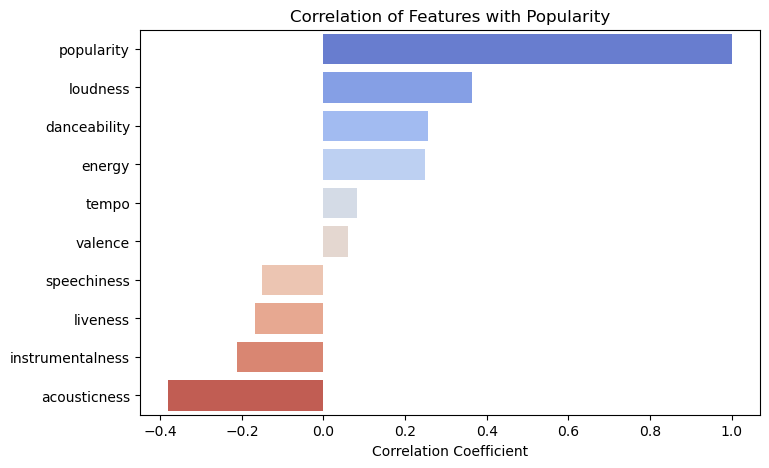

In [14]:
plt.figure(figsize=(8,5))
corr_pop = df[num_features + ['popularity']].corr()['popularity'].sort_values(ascending=False)
sns.barplot(x=corr_pop.values, y=corr_pop.index, palette='coolwarm')
plt.title("Correlation of Features with Popularity")
plt.xlabel("Correlation Coefficient")
plt.show()

## Define features & target (optionally add duration_min)


In [15]:
# --- CONFIG ---
SEED = 42

# Your chosen features (all numeric & model-ready)
features = ['danceability', 'energy', 'acousticness', 'instrumentalness',
            'liveness', 'loudness', 'speechiness', 'tempo', 'valence']

# If you want duration, add this (recommended):
if 'duration_min' not in df.columns and 'duration_ms' in df.columns:
    df['duration_min'] = df['duration_ms'] / 60000
    # If adding duration:
    # features.append('duration_min')

target = ['popularity']

# Keep just what we need (helps avoid accidental leakage)
cols_needed = list(set(features + target))
data = df[cols_needed].dropna().copy()

X = data[features]
y = data[target]
X.head(), y.head()


(   danceability  energy  acousticness  instrumentalness  liveness  loudness  \
 0         0.389   0.910         0.611             0.000    0.3460    -1.828   
 1         0.590   0.737         0.246             0.000    0.1510    -5.559   
 2         0.663   0.131         0.952             0.000    0.1030   -13.879   
 3         0.240   0.326         0.703             0.000    0.0985   -12.178   
 4         0.331   0.225         0.950             0.123    0.2020   -21.150   
 
    speechiness    tempo  valence  
 0       0.0525  166.969    0.814  
 1       0.0868  174.003    0.816  
 2       0.0362   99.488    0.368  
 3       0.0395  171.758    0.227  
 4       0.0456  140.576    0.390  ,
    popularity
 0           0
 1           1
 2           3
 3           0
 4           4)

## Train/Val/Test split + scaling (fit scaler on train only)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 70/15/15 split
X_train, X_tmp, y_train, y_tmp = train_test_split(
    X, y, test_size=0.30, random_state=SEED
)
X_val, X_test, y_val, y_test = train_test_split(
    X_tmp, y_tmp, test_size=0.50, random_state=SEED
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

print("Shapes:")
print("X_train:", X_train_scaled.shape, "| y_train:", y_train.shape)
print("X_val:",   X_val_scaled.shape,   " | y_val:",   y_val.shape)
print("X_test:",  X_test_scaled.shape,  " | y_test:",  y_test.shape)

# Optional: quick sanity check — scaled train features should be ~0 mean / unit std
train_means = np.mean(X_train_scaled, axis=0).round(3)
train_stds  = np.std(X_train_scaled, axis=0).round(3)
print("\nScaled train means:", dict(zip(features, train_means)))
print("Scaled train stds: ", dict(zip(features, train_stds)))


Shapes:
X_train: (162907, 9) | y_train: (162907, 1)
X_val: (34909, 9)  | y_val: (34909, 1)
X_test: (34909, 9)  | y_test: (34909, 1)

Scaled train means: {'danceability': -0.0, 'energy': -0.0, 'acousticness': 0.0, 'instrumentalness': 0.0, 'liveness': 0.0, 'loudness': 0.0, 'speechiness': -0.0, 'tempo': 0.0, 'valence': 0.0}
Scaled train stds:  {'danceability': 1.0, 'energy': 1.0, 'acousticness': 1.0, 'instrumentalness': 1.0, 'liveness': 1.0, 'loudness': 1.0, 'speechiness': 1.0, 'tempo': 1.0, 'valence': 1.0}


## (Optional) Prepare PyTorch tensors & DataLoaders


In [17]:
import torch
from torch.utils.data import TensorDataset, DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert to float32 tensors
X_train_t = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_t = torch.tensor(y_train.values, dtype=torch.float32)

X_val_t   = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_t   = torch.tensor(y_val.values, dtype=torch.float32)

X_test_t  = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_t  = torch.tensor(y_test.values, dtype=torch.float32)

# DataLoaders
BATCH_SIZE = 256
train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=BATCH_SIZE, shuffle=True)
val_loader   = DataLoader(TensorDataset(X_val_t,   y_val_t),   batch_size=BATCH_SIZE, shuffle=False)
test_loader  = DataLoader(TensorDataset(X_test_t,  y_test_t),  batch_size=BATCH_SIZE, shuffle=False)

X_train_t.shape, y_train_t.shape, X_val_t.shape, X_test_t.shape, device



(torch.Size([162907, 9]),
 torch.Size([162907, 1]),
 torch.Size([34909, 9]),
 torch.Size([34909, 9]),
 device(type='cpu'))

popularity          1.000000
loudness            0.363011
danceability        0.256564
energy              0.248922
tempo               0.081039
valence             0.060076
speechiness        -0.151076
liveness           -0.167995
instrumentalness   -0.210983
acousticness       -0.381295
Name: popularity, dtype: float64

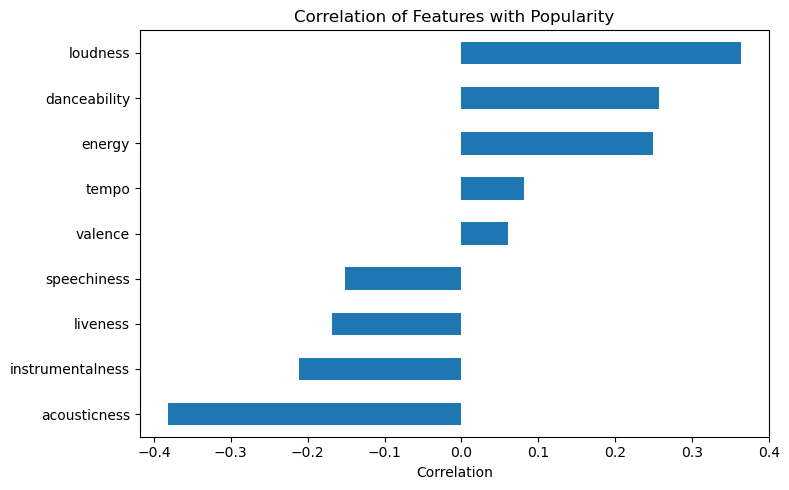

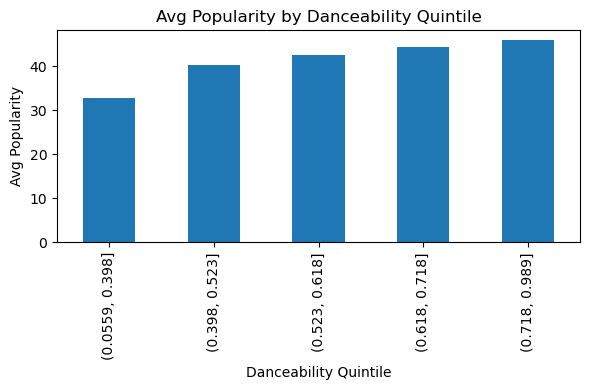

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Correlation with popularity (original scale, not standardized arrays)
corr_with_pop = data[features + ['popularity']].corr()['popularity'].sort_values(ascending=False)
display(corr_with_pop)

# Plot: Feature correlations with popularity
plt.figure(figsize=(8,5))
corr_with_pop.drop('popularity').plot(kind='barh')
plt.gca().invert_yaxis()
plt.title("Correlation of Features with Popularity")
plt.xlabel("Correlation")
plt.tight_layout()
plt.show()

# Plot: Popularity by quantiles of a key feature (e.g., danceability)
q = pd.qcut(data['danceability'], q=5, duplicates='drop')
pop_by_q = data.groupby(q)['popularity'].mean()
plt.figure(figsize=(6,4))
pop_by_q.plot(kind='bar')
plt.title("Avg Popularity by Danceability Quintile")
plt.ylabel("Avg Popularity")
plt.xlabel("Danceability Quintile")
plt.tight_layout()
plt.show()
